### F1_score 适用于对precision、recall没特殊要求，希望都越高越好的情况

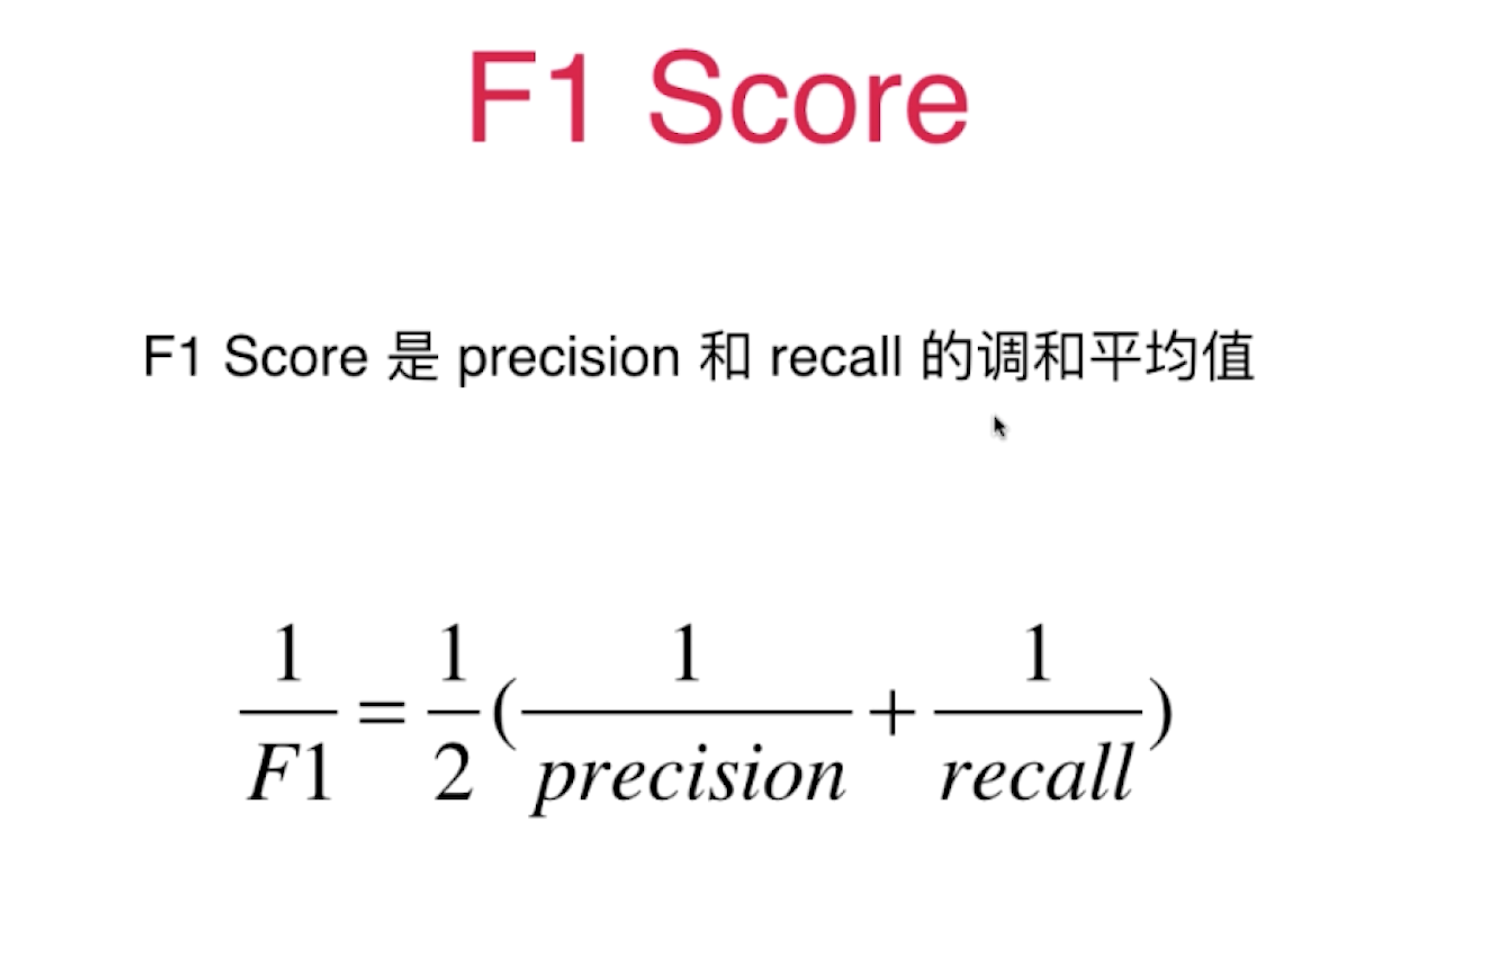

### 调和平均数的优势是，只要precision, recall任何一项过低，F1score就会低

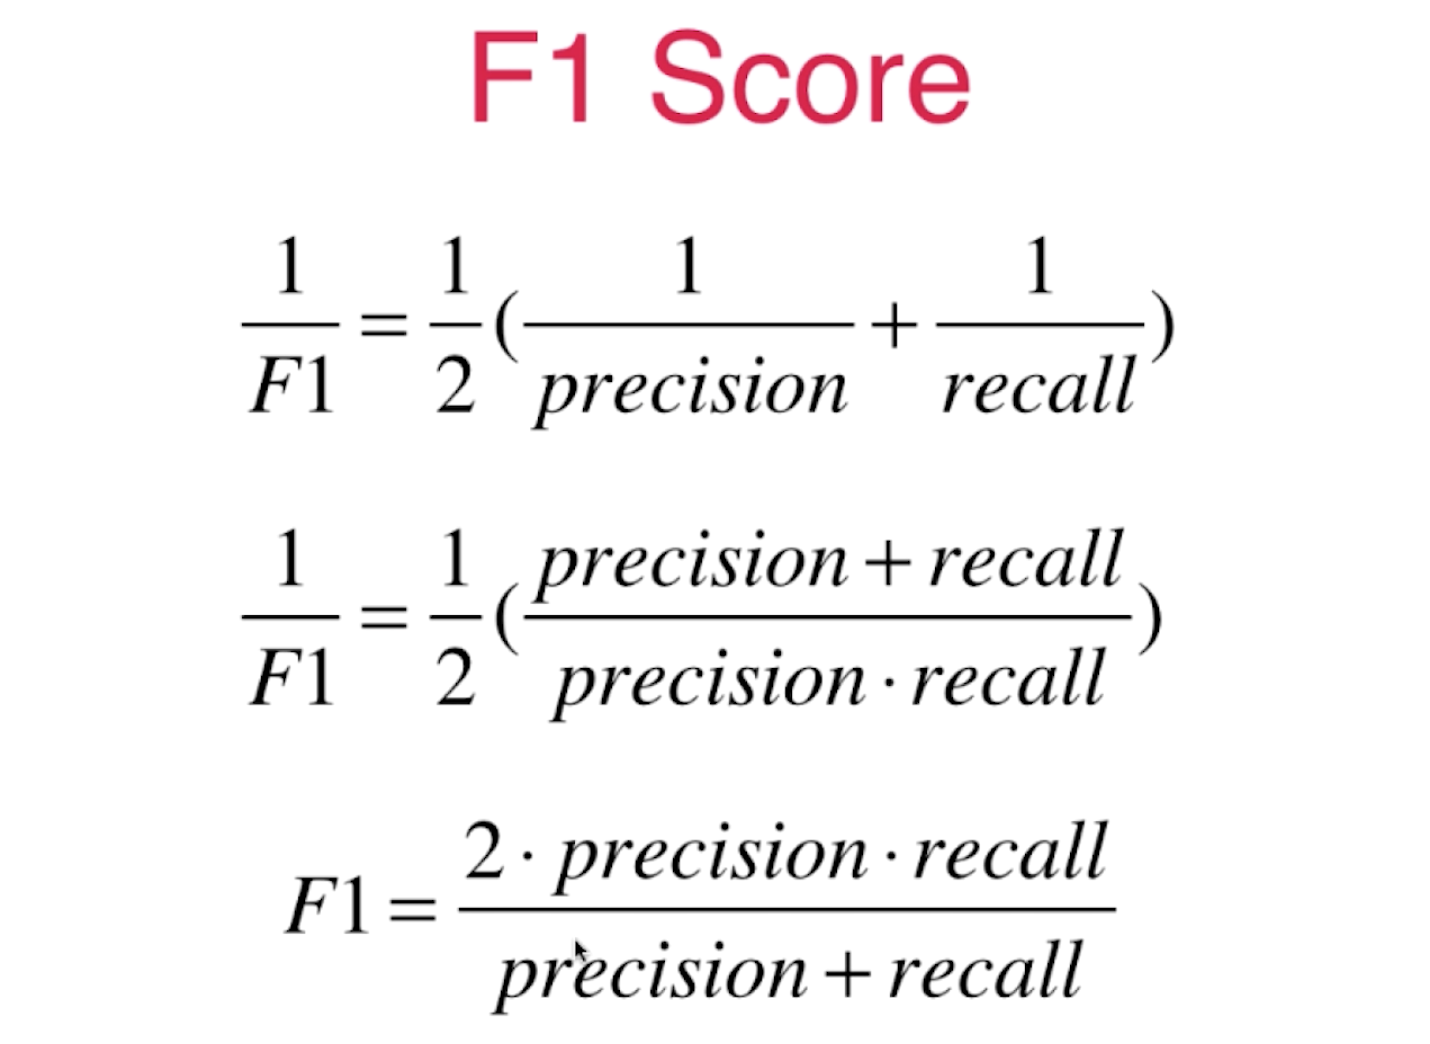

In [1]:
import numpy as np

In [2]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [3]:
# 两者相等，f1_score也相等
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [4]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [6]:
precision = 0.0
recall = 1.0
f1_score(precision, recall)

0.0

In [7]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()   #这里的等号只是引用!!!

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [16]:
y_predict = log_reg.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]])

In [18]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [19]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [20]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

### f1_score, 被recall拉低了
### 同时，f1_score，精准率，召回率都比自带的score低，说明数据有偏
### 此处f1_score能更好的反应模型准确率